In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization(for EDA)
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#We will use the popular scikit-learn library to develop our machine learning algorithms

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc

# Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import string

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# link --->https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/
df_test = pd.read_csv("../data/test.csv")
df_train = pd.read_csv("../data/train.csv")

# link---> w3resource.com/pandas/concat.php
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Use DataFrame.loc attribute to access a particular cell in the given Dataframe using the index and column labels.
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)
    # Returns divided dfs of training and test set 

df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

In [3]:
df_all.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1203,NaN,NaN,S,7.575,"Sadowitz, Mr. Harry",0,1204,3,male,0,NaN,LP 1588
641,24.0,B35,C,69.300,"Sagesser, Mlle. Emma",0,642,1,female,0,1.0,PC 17477
188,40.0,NaN,Q,15.500,"Bourke, Mr. John",1,189,3,male,1,0.0,364849
153,40.5,NaN,S,14.500,"van Billiard, Mr. Austin Blyler",2,154,3,male,0,0.0,A/5. 851
386,1.0,NaN,S,46.900,"Goodwin, Master. Sidney Leonard",2,387,3,male,5,0.0,CA 2144
221,27.0,NaN,S,13.000,"Bracken, Mr. James H",0,222,2,male,0,0.0,220367
1020,24.0,NaN,S,8.050,"Petersen, Mr. Marius",0,1021,3,male,0,NaN,342441
776,NaN,F38,Q,7.750,"Tobin, Mr. Roger",0,777,3,male,0,0.0,383121
208,16.0,NaN,Q,7.750,"Carr, Miss. Helen ""Ellen""",0,209,3,female,0,1.0,367231
211,35.0,NaN,S,21.000,"Cameron, Miss. Clear Annie",0,212,2,female,0,1.0,F.C.C. 13528


In [5]:
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S


In [6]:
# Counting the total missing values in respective features
total_missing_train = df_train.isnull().sum().sort_values(ascending=False)

# Calculating the percent of missing values in respective features
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False) # Rounding the percent calculated in percent_1 to one decimal.

#w3resource.com/pandas/concat.php
train_missing_data = pd.concat([total_missing_train, percent_2], axis=1, keys=['Total', '%'])

print(total_missing_train)

print('_'*25)

train_missing_data.head(5) 

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64
_________________________


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [7]:
total_missing_test = df_test.isnull().sum().sort_values(ascending=False)

percent_3 = df_test.isnull().sum()/df_test.isnull().count()*100
percent_4 = (round(percent_3, 1)).sort_values(ascending=False) 

test_missing_data = pd.concat([total_missing_test, percent_4], axis=1, keys=['Total', '%']) #w3resource.com/pandas/concat.php

print(total_missing_test)

print('_'*25)

test_missing_data.head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64
_________________________


,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0


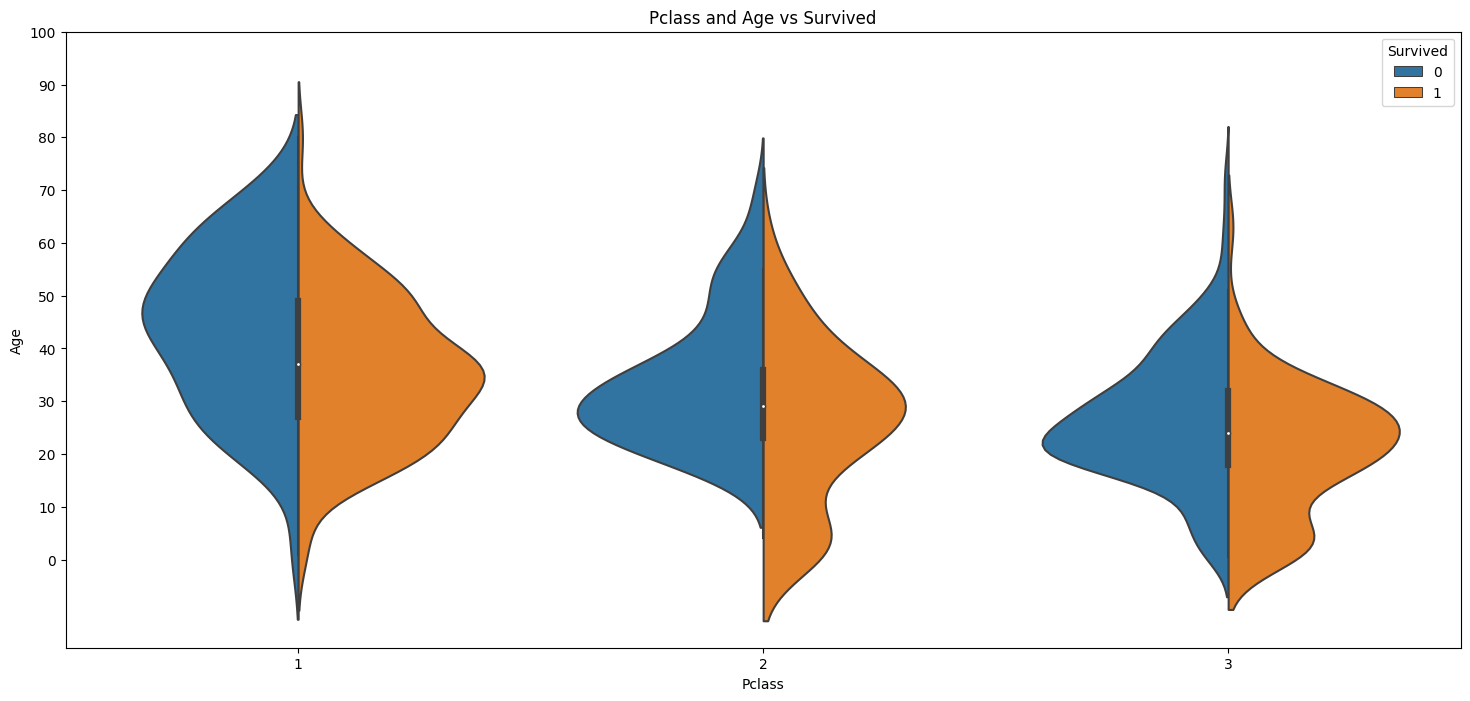

In [12]:
# link --> https://www.geeksforgeeks.org/matplotlib-pyplot-subplots-in-python/
f,ax=plt.subplots(figsize=(18,8))

# link --> https://seaborn.pydata.org/generated/seaborn.violinplot.html
sns.violinplot(data= df_train, x="Pclass",y="Age", hue="Survived",split=True,ax=ax)

ax.set_title('Pclass and Age vs Survived')

ax.set_yticks(range(0,110,10)) # set_yticks() function in axes module is used to Set the y ticks with list of ticks.

plt.show()

In [13]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)

df_all_corr[df_all_corr['Feature 1'] == 'Pclass'] 

ValueError: could not convert string to float: 'C85'